In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('placement.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [8]:
df.head(3)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1


In [10]:
df.shape

(1000, 3)

In [11]:
df.sample(4)

,cgpa,placement_exam_marks,placed
883,7.98,6.0,1
766,7.17,34.0,0
958,7.43,11.0,0
67,8.04,18.0,1


## Plot Show in CGPA and Placement Marks

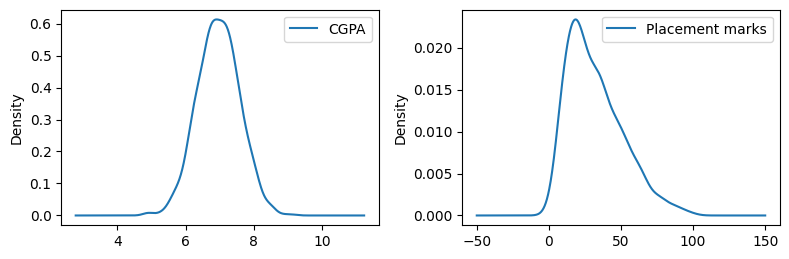

In [82]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(221)
df['cgpa'].plot.density(ax = ax, legend = True, label = 'CGPA')
ax1 = fig.add_subplot(222)
df['placement_exam_marks'].plot.density(ax = ax1,legend = True, label = 'Placement marks')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

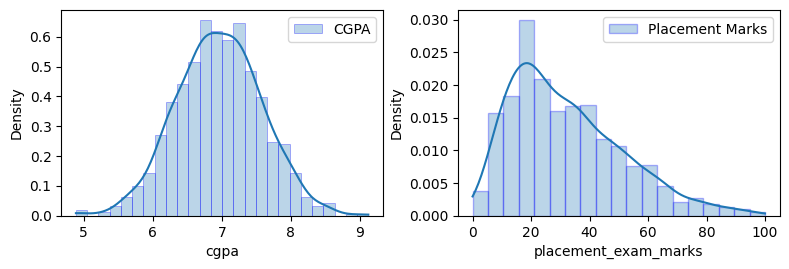

In [143]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(221)
sns.histplot( df['cgpa'], ax = ax, kde = True, stat = 'density', legend = True, label = "CGPA", alpha = 0.3, edgecolor = (0, 0, 1, 0.3))
ax.legend(loc='upper right')
ax1 = fig.add_subplot(222)
sns.histplot( df['placement_exam_marks'], ax = ax1, kde = True, stat = 'density', legend = True, label = "Placement Marks", alpha = 0.3, edgecolor = (0, 0, 1, 0.3))
plt.tight_layout()
plt.legend(loc = 'upper right')
plt.show()

In [157]:
print(f"""Mean value of CGPA: {df['cgpa'].mean()}
Std value of CGPA: {df['cgpa'].std()}
Min value of CGPA: {df['cgpa'].min()}
Max value of CGPA: {df['cgpa'].max()}""")

Mean value of CGPA: 6.96124
Std value of CGPA: 0.6158978751323896
Min value of CGPA: 4.89
Max value of CGPA: 9.12


## Approach 1
### Step 1:Finding the boundary values (Highest & Lowest)

In [160]:
print(f"""Highest allowed value: {df['cgpa'].mean() + (3*df['cgpa'].std())}
Lowest allowed value: {df['cgpa'].mean() - (3*df['cgpa'].std())}""")

Highest allowed value: 8.808933625397168
Lowest allowed value: 5.113546374602832


In [164]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [170]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### Approach 2 : Calculating the Zscore

In [173]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


## CGPA Score More then 3

In [181]:
df[df['cgpa_zscore'] > 3 ]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [182]:
df[df['cgpa_zscore'] < -3 ]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [183]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [189]:
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363
